C:\Users\SHIFTA-0164\AppData\Local\Temp\ipykernel_24508\379082514.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mes', y='Ventas',data= df_santa_ana, palette='Set2')


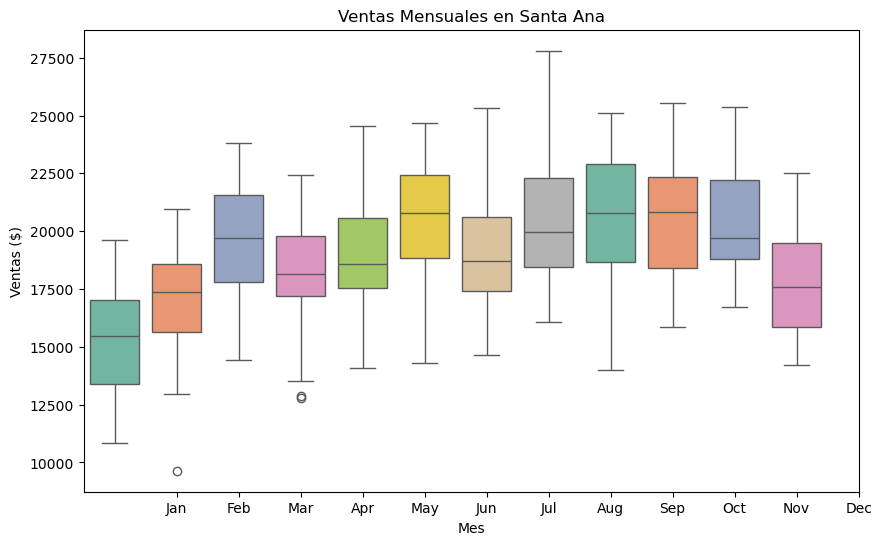

C:\Users\SHIFTA-0164\AppData\Local\Temp\ipykernel_24508\379082514.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mes', y='Ventas', data= df_la_floresta, palette='Set2')


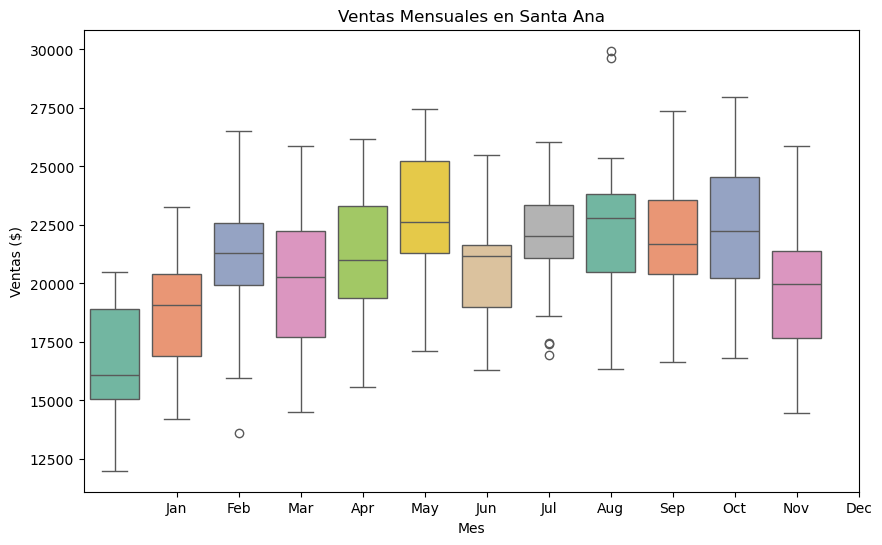

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

# Cargar los datos
# Cargar el archivo Excel
archivo_excel = 'Grupo_5.xlsx'

# Cargar la hoja de Excel en un DataFrame de pandas
df_santa_ana = pd.read_excel(archivo_excel, sheet_name="Santa Ana")
df_la_floresta = pd.read_excel(archivo_excel, sheet_name="La Floresta")

# Calcular ventas mensuales para Santa Ana
df_santa_ana['Mes'] = df_santa_ana['Fecha'].dt.month
monthly_sales_sa = df_santa_ana.groupby('Mes')['Ventas'].agg(['mean', 'std'])

# Visualización de ventas mensuales en Santa Ana
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mes', y='Ventas',data= df_santa_ana, palette='Set2')
plt.title('Ventas Mensuales en Santa Ana')
plt.xlabel('Mes')
plt.ylabel('Ventas ($)')
plt.xticks(ticks=np.arange(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.show()


# Calcular ventas mensuales para La Floresta
df_la_floresta['Mes'] = df_la_floresta['Fecha'].dt.month
monthly_sales_lf = df_la_floresta.groupby('Mes')['Ventas'].agg(['mean', 'std'])


# Visualización de ventas mensuales en La Floresta
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mes', y='Ventas', data= df_la_floresta, palette='Set2')
plt.title('Ventas Mensuales en Santa Ana')
plt.xlabel('Mes')
plt.ylabel('Ventas ($)')
plt.xticks(ticks=np.arange(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.show()



C:\Users\SHIFTA-0164\AppData\Local\Temp\ipykernel_24508\3548181532.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dia_Semana', y='Ventas', data=df_santa_ana, palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


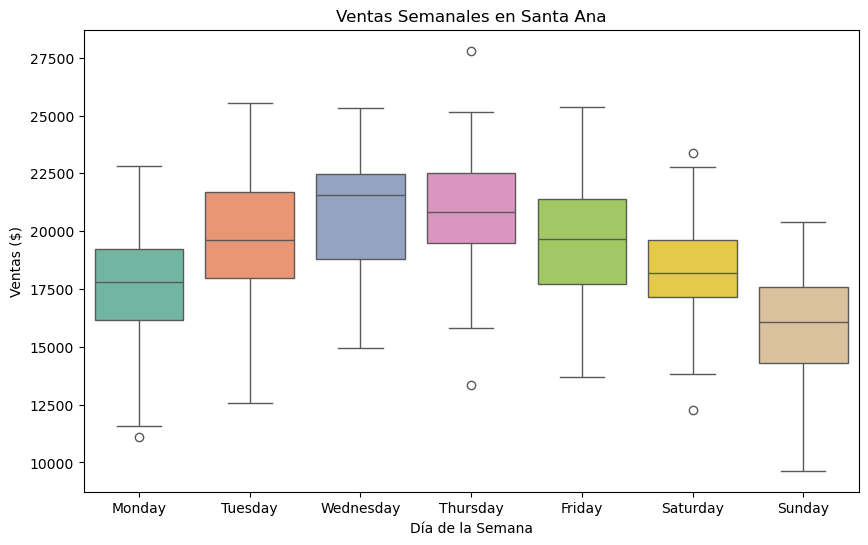

In [11]:
# Calcular ventas semanales para Santa Ana
df_santa_ana['Dia_Semana'] = df_santa_ana['Fecha'].dt.day_name()
weekly_sales_sa = df_santa_ana.groupby('Dia_Semana')['Ventas'].agg(['mean', 'std'])

# Visualización de ventas semanales en Santa Ana
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dia_Semana', y='Ventas', data=df_santa_ana, palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ventas Semanales en Santa Ana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas ($)')
plt.show()


C:\Users\SHIFTA-0164\AppData\Local\Temp\ipykernel_24508\3115437739.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dia_Semana', y='Ventas', data=df_la_floresta, palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


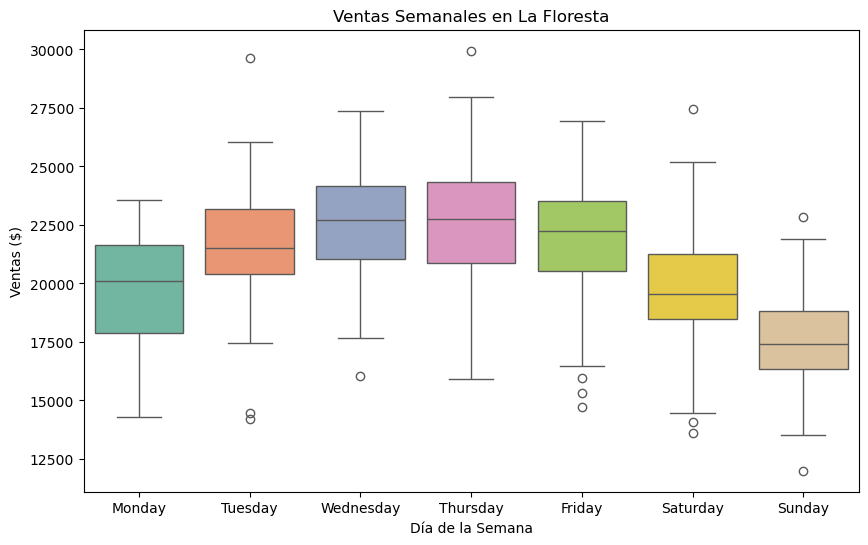

In [12]:
# Calcular ventas semanales para La Floresta
df_la_floresta['Dia_Semana'] =df_la_floresta['Fecha'].dt.day_name()
weekly_sales_lf = df_la_floresta.groupby('Dia_Semana')['Ventas'].agg(['mean', 'std'])

# Visualización de ventas semanales en La Floresta
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dia_Semana', y='Ventas', data=df_la_floresta, palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ventas Semanales en La Floresta')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas ($)')
plt.show()


In [15]:
from scipy.stats import ttest_ind

# Prueba de hipótesis t de Student para comparar las ventas promedio
t_statistic, p_value = ttest_ind(df_santa_ana['Ventas'], df_la_floresta['Ventas'])
alpha = 0.05

if p_value < alpha:
    conclusion = 'Hay evidencia estadísticamente significativa para rechazar la hipótesis nula.'
else:
    conclusion = 'No hay suficiente evidencia para rechazar la hipótesis nula.'

print(f"Prueba de Hipótesis: p-value = {p_value:.6f}. {conclusion}")


Prueba de Hipótesis: p-value = 0.000000. Hay evidencia estadísticamente significativa para rechazar la hipótesis nula.


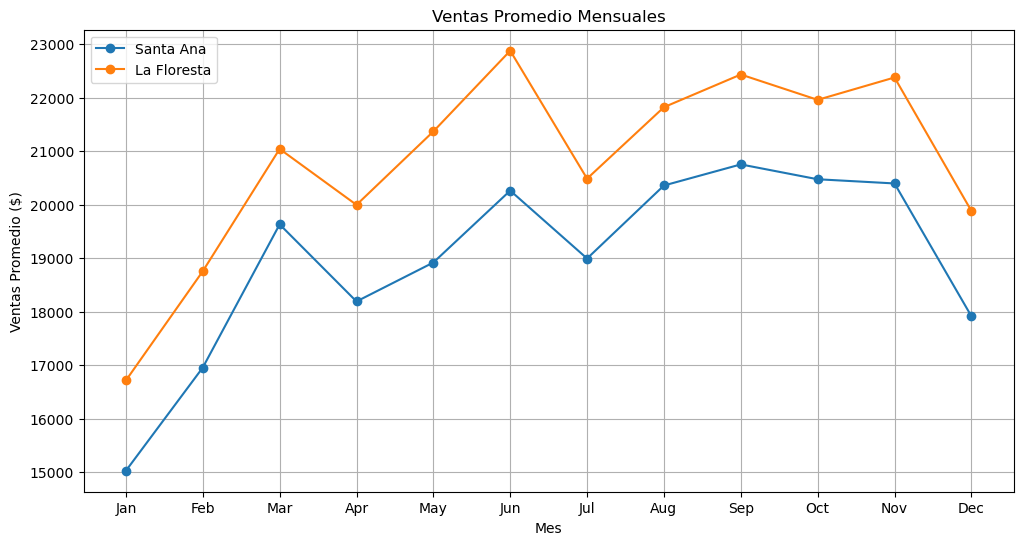

In [6]:
# Calcular ventas promedio mensuales para Santa Ana y La Floresta
monthly_avg_sales_sa = df_santa_ana.groupby('Mes')['Ventas'].mean()
monthly_avg_sales_lf = df_la_floresta.groupby('Mes')['Ventas'].mean()

# Visualización de ventas promedio mensuales
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_sales_sa.index, monthly_avg_sales_sa.values, marker='o', linestyle='-', label='Santa Ana')
plt.plot(monthly_avg_sales_lf.index, monthly_avg_sales_lf.values, marker='o', linestyle='-', label='La Floresta')
plt.title('Ventas Promedio Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio ($)')
plt.xticks(ticks=np.arange(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.legend()
plt.grid(True)
plt.show()


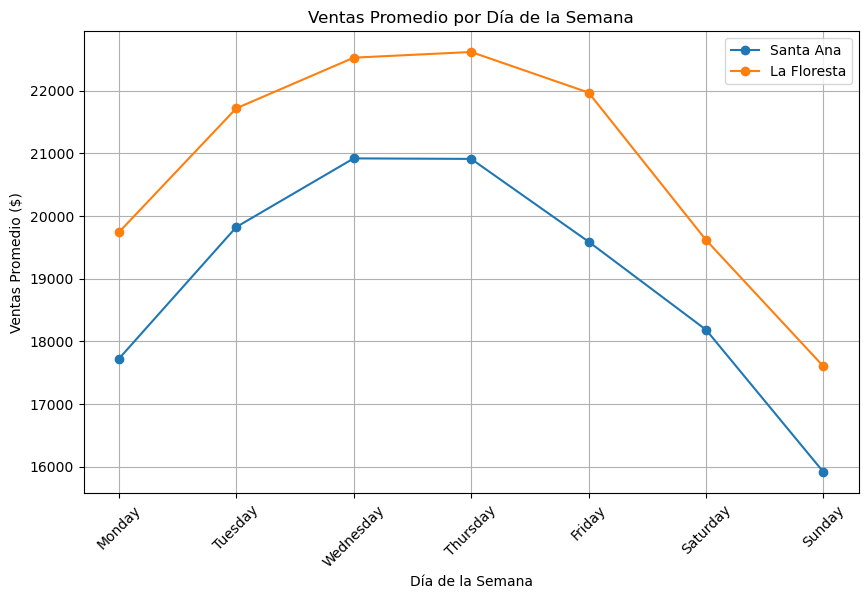

In [7]:
# Calcular ventas promedio por día de la semana para Santa Ana y La Floresta
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg_sales_sa = df_santa_ana.groupby('Dia_Semana')['Ventas'].mean().reindex(weekday_order)
weekly_avg_sales_lf = df_la_floresta.groupby('Dia_Semana')['Ventas'].mean().reindex(weekday_order)

# Visualización de ventas promedio por día de la semana
plt.figure(figsize=(10, 6))
plt.plot(weekly_avg_sales_sa.index, weekly_avg_sales_sa.values, marker='o', linestyle='-', label='Santa Ana')
plt.plot(weekly_avg_sales_lf.index, weekly_avg_sales_lf.values, marker='o', linestyle='-', label='La Floresta')
plt.title('Ventas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Promedio ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Calcular ventas totales y promedio para ambas tiendas
total_sales_sa = df_santa_ana['Ventas'].sum()
total_sales_lf =df_la_floresta['Ventas'].sum()
avg_sales_sa = df_santa_ana['Ventas'].mean()
avg_sales_lf = df_la_floresta['Ventas'].mean()

print(f"Ventas totales en Santa Ana: ${total_sales_sa:.2f}")
print(f"Ventas totales en La Floresta: ${total_sales_lf:.2f}")
print(f"Ventas promedio diarias en Santa Ana: ${avg_sales_sa:.2f}")
print(f"Ventas promedio diarias en La Floresta: ${avg_sales_lf:.2f}")


Ventas totales en Santa Ana: $6934926.83
Ventas totales en La Floresta: $7598430.63
Ventas promedio diarias en Santa Ana: $18999.80
Ventas promedio diarias en La Floresta: $20817.62


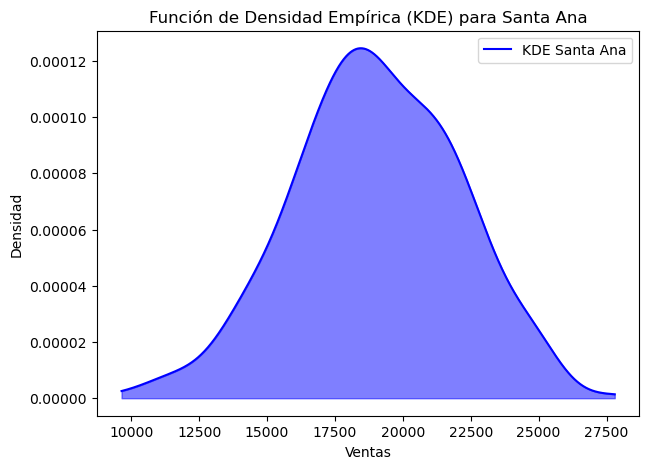

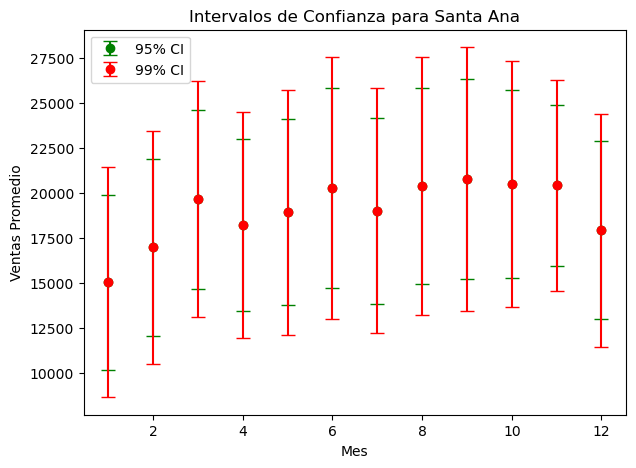

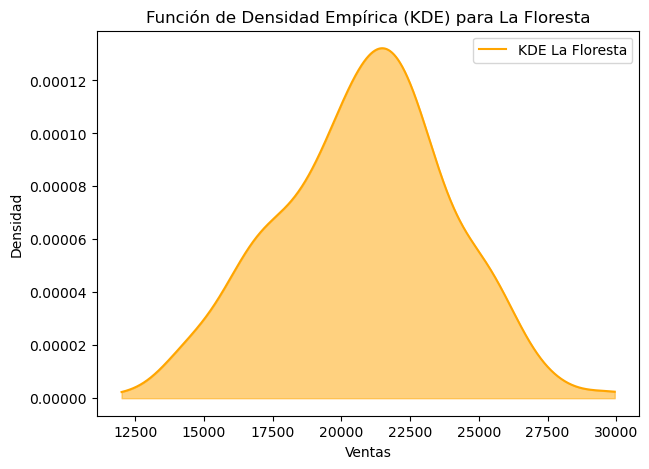

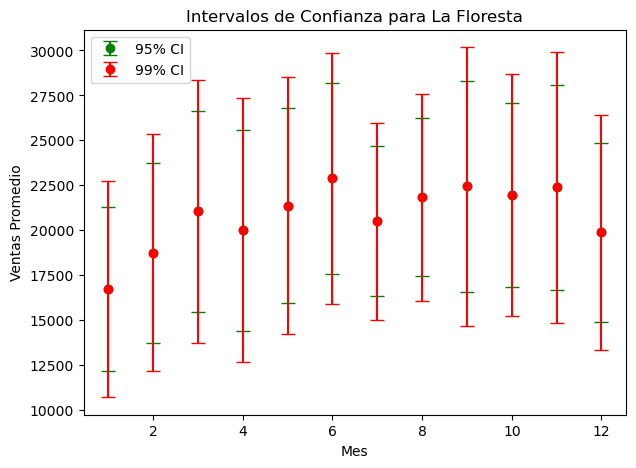

In [22]:

from scipy.stats import gaussian_kde, norm
# Agrupar por mes y calcular estadísticas para Santa Ana
santa_ana_monthly = df_santa_ana.groupby(df_santa_ana['Fecha'].dt.month)['Ventas'].agg(['mean', 'std'])

# Función de densidad empírica usando KDE para Santa Ana
kde_santa_ana = gaussian_kde(df_santa_ana['Ventas']) # type: ignore

# Intervalos de confianza empíricos para Santa Ana
conf_int_95_santa_ana = norm.interval(0.95, loc=santa_ana_monthly['mean'], scale=santa_ana_monthly['std'])
conf_int_99_santa_ana = norm.interval(0.99, loc=santa_ana_monthly['mean'], scale=santa_ana_monthly['std'])

# Repetir para La Floresta de manera similar
# Agrupar por mes y calcular estadísticas para La Floresta
la_floresta_monthly = df_la_floresta.groupby(df_la_floresta['Fecha'].dt.month)['Ventas'].agg(['mean', 'std'])

# Función de densidad empírica usando KDE para La Floresta
kde_la_floresta = gaussian_kde(df_la_floresta['Ventas'])

# Intervalos de confianza empíricos para La Floresta
conf_int_95_la_floresta = norm.interval(0.95, loc=la_floresta_monthly['mean'], scale=la_floresta_monthly['std'])
conf_int_99_la_floresta = norm.interval(0.99, loc=la_floresta_monthly['mean'], scale=la_floresta_monthly['std'])

# Visualización de resultados y conclusiones en el informe final

# Gráfica de densidad empírica para Santa Ana
plt.figure(figsize=(7, 5))
x_santa_ana = np.linspace(min(df_santa_ana['Ventas']), max(df_santa_ana['Ventas']), 1000)
plt.plot(x_santa_ana, kde_santa_ana(x_santa_ana), label='KDE Santa Ana', color='blue')
plt.fill_between(x_santa_ana, kde_santa_ana(x_santa_ana), alpha=0.5, color='blue')
plt.title('Función de Densidad Empírica (KDE) para Santa Ana')
plt.xlabel('Ventas')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Gráfica de intervalos de confianza para Santa Ana
plt.figure(figsize=(7, 5))
plt.errorbar(santa_ana_monthly.index, santa_ana_monthly['mean'], yerr=[santa_ana_monthly['mean'] - conf_int_95_santa_ana[0], conf_int_95_santa_ana[1] - santa_ana_monthly['mean']], fmt='o', capsize=5, label='95% CI', color='green')
plt.errorbar(santa_ana_monthly.index, santa_ana_monthly['mean'], yerr=[santa_ana_monthly['mean'] - conf_int_99_santa_ana[0], conf_int_99_santa_ana[1] - santa_ana_monthly['mean']], fmt='o', capsize=5, label='99% CI', color='red')
plt.title('Intervalos de Confianza para Santa Ana')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.legend()
plt.show()

# Gráfica de densidad empírica para La Floresta
plt.figure(figsize=(7, 5))
x_la_floresta = np.linspace(min(df_la_floresta['Ventas']), max(df_la_floresta['Ventas']), 1000)
plt.plot(x_la_floresta, kde_la_floresta(x_la_floresta), label='KDE La Floresta', color='orange')
plt.fill_between(x_la_floresta, kde_la_floresta(x_la_floresta), alpha=0.5, color='orange')
plt.title('Función de Densidad Empírica (KDE) para La Floresta')
plt.xlabel('Ventas')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Gráfica de intervalos de confianza para La Floresta
plt.figure(figsize=(7, 5))
plt.errorbar(la_floresta_monthly.index, la_floresta_monthly['mean'], yerr=[la_floresta_monthly['mean'] - conf_int_95_la_floresta[0], conf_int_95_la_floresta[1] - la_floresta_monthly['mean']], fmt='o', capsize=5, label='95% CI', color='green')
plt.errorbar(la_floresta_monthly.index, la_floresta_monthly['mean'], yerr=[la_floresta_monthly['mean'] - conf_int_99_la_floresta[0], conf_int_99_la_floresta[1] - la_floresta_monthly['mean']], fmt='o', capsize=5, label='99% CI', color='red')
plt.title('Intervalos de Confianza para La Floresta')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.legend()
plt.show()



